# Procesamiendo Digital de Audio
## Caleb Rascón
### Cálculo de Dirección de Arribo
#### Sesión 6.1
##### Este notebook se usa para apreciar lo útil que puede ser prototipar antes de pasar nuestra idea a C donde puede ser más difícil encontrar el error.

In [2]:

#Bibliotecas
import numpy as np
from matplotlib import pyplot as plt

### Ejercicio 1

Hacemos un desfazamiento artificial para y de 15 muestras

In [3]:
#Iniciamos 
t = np.arange(100)

x = np.exp(-t/10)

#la señal y es igual pero movida
y = np.zeros(x.shape[0])
y[15:] = x[:-15]


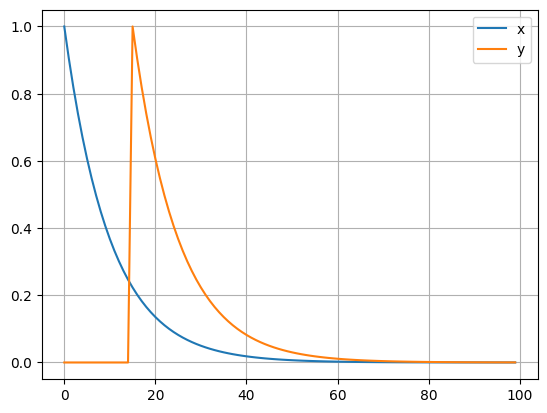

In [4]:
plt.plot(t, x, label="x")
plt.plot(t,y, label='y')
plt.legend()
plt.grid()
plt.show()

Calculamos las señales centradas quitando su valor de DC

In [5]:
x_c = x - x.mean()
y_c = y - y.mean()


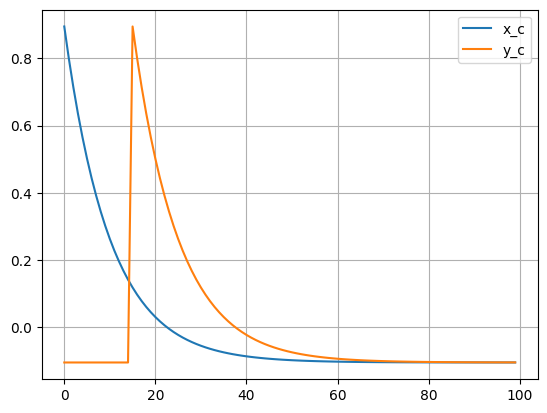

In [6]:
plt.plot(t, x_c, label="x_c")
plt.plot(t,y_c, label='y_c')
plt.legend()
plt.grid()
plt.show()

Calculamos el Coeficiente de Correlación 

In [7]:
r = np.corrcoef(x_c,y_c)
r

array([[1.        , 0.02877086],
       [0.02877086, 1.        ]])

Movemos la señal artificialmente por 6 muestras y calculamos de nuevo el Coeficiente de Correlación

In [8]:
y_d = y[6:]
x_d = x[:-6]

y_dc = y_d - y_d.mean()
x_dc = x_d - x_d.mean()

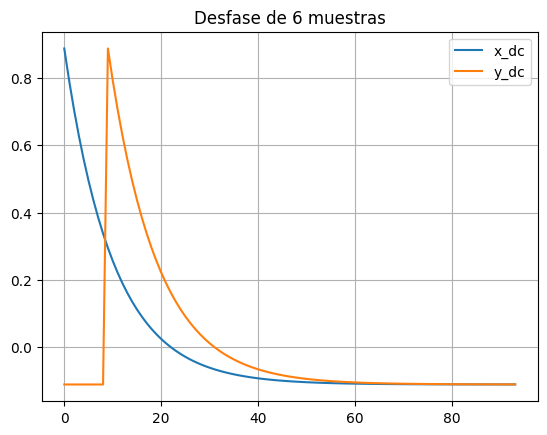

In [9]:
plt.plot(x_dc, label="x_dc")
plt.plot(y_dc, label='y_dc')
plt.title("Desfase de 6 muestras")
plt.legend()
plt.grid()
plt.show()

In [10]:
np.corrcoef(x_dc, y_dc)

array([[1.        , 0.24607165],
       [0.24607165, 1.        ]])

Hacemos un desfase artificial de 15 muestras

In [11]:
y_d = y[15:]
x_d = x[:-15]

y_dc = y_d - y_d.mean()
x_dc = x_d - x_d.mean()

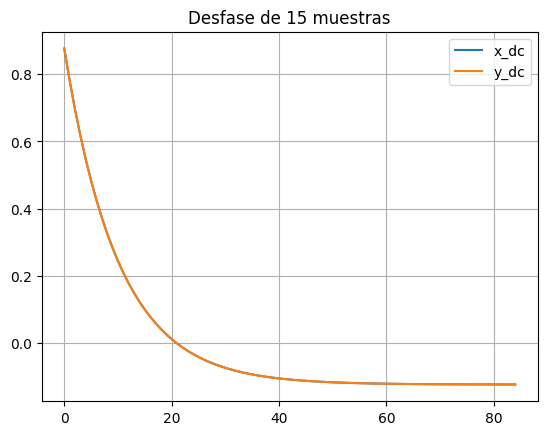

In [12]:
plt.plot(x_dc, label="x_dc")
plt.plot(y_dc, label='y_dc')
plt.title("Desfase de 15 muestras")
plt.legend()
plt.grid()
plt.show()

In [13]:
np.corrcoef(x_dc, y_dc)

array([[1., 1.],
       [1., 1.]])

### Ejercicio 2

Transformada de Fourier

In [14]:
x_f = np.fft.fft(x_c)
y_f = np.fft.fft(y_c)

Calculamos el vector completo de un solo paso

In [15]:
ccv_f = np.conj(x_f) * y_f
ccv = np.real(np.fft.ifft(ccv_f)) / np.dot(np.linalg.norm(x_c), np.linalg.norm(y_c)) 

Le damos el formato correcto a la gráfica

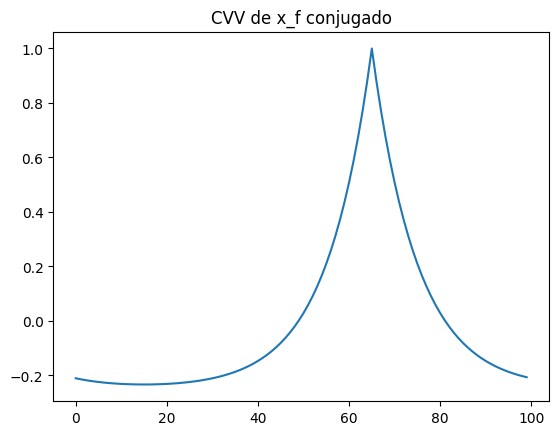

In [16]:
plt.plot(
    np.concatenate((ccv[ccv.shape[0]//2: ],
                    ccv[ :ccv.shape[0]//2] ))
)
plt.title("CVV de x_f conjugado")
plt.show()

Obtenemos el argmax para conocer el desfase

In [18]:
mi = np.argmax(ccv)
print(f"El índice es {mi}")

#Checamos si es positivo o negativo
if mi < ccv.shape[0]//2:
    desfase = mi
else:
    desfase = mi - ccv.shape[0]

print(f"El desfase entonces es: {desfase}")

El índice es 15
El desfase entonces es: 15


### Ejercicio 3

In [19]:
ccv_f_y = np.conj(y_f) * x_f
ccv_y = np.real(np.fft.ifft(ccv_f_y)) / np.dot(np.linalg.norm(x_c), np.linalg.norm(y_c) )

Text(0.5, 1.0, 'CVV de y_f conjudado')

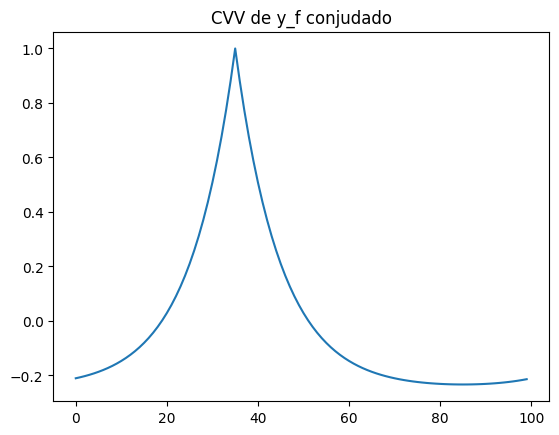

In [20]:
plt.plot(
    np.concatenate((ccv_y[ccv_y.shape[0]//2: ],
                    ccv_y[ :ccv_y.shape[0]//2] ))
)
plt.title("CVV de y_f conjudado")

La señal que se saca el conjugado es el micrófono de referencia

### Ejercicio 4
#### Correlación Cruzada Generalizada

In [21]:
ccv_fp = np.conj(x_f) * y_f / (np.abs(np.conj(x_f) * y_f))

In [22]:
ccvp = np.real(np.fft.ifft(ccv_fp))

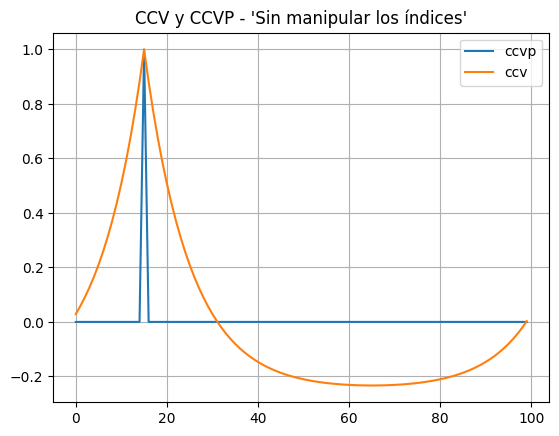

In [23]:
plt.plot(ccvp, label='ccvp')
plt.plot(ccv, label='ccv')
plt.title("CCV y CCVP - 'Sin manipular los índices'")
plt.grid()
plt.legend()
plt.show()

Al aplicar PHAT, la IFFT se hace sensible a
sangrado si ocurren discontinuidades entre el
inicio y el fin de los valores de energía en
ventanas pequeñas.

Por lo cual se recomienda que apliques ventaneo; ya que metería ruido en el ángulo 0, lo cual sería inconveniente porque no sabes si es ruído o efectivamente una fuente en el ángulo 0.